In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split 
%matplotlib inline

path ="/content/drive/MyDrive/Colab Notebooks/Fishd.csv"
df = pd.read_csv(path)

df.describe

<bound method NDFrame.describe of            Species  Weight  Length1  Length2  Length3   Height   Width
0    Rainbow Trout   245.0     23.2     25.4     30.0  11.5200  4.0200
1    Rainbow Trout   290.0     24.0     26.3     31.2  12.4800  4.3056
2    Rainbow Trout   335.0     23.9     26.5     31.1  12.3778  4.6961
3    Rainbow Trout   380.0     26.3     29.0     33.5  12.7300  4.4555
4    Rainbow Trout   425.0     26.5     29.0     34.0  12.4440  5.1340
..             ...     ...      ...      ...      ...      ...     ...
154    muskellunge  1777.0     11.5     12.2     13.4   2.0904  1.3936
155    muskellunge  1778.0     11.7     12.4     13.5   2.4300  1.2690
156    muskellunge  1777.0     12.1     13.0     13.8   2.2770  1.2558
157    muskellunge  1778.0     13.2     14.3     15.2   2.8728  2.0672
158    muskellunge  1777.0     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]>

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fishd.csv")
data.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Rainbow Trout,245.0,23.200000,25.4,30.0,11.5200,4.0200
1,Rainbow Trout,290.0,24.000000,26.3,31.2,12.4800,4.3056
2,Rainbow Trout,335.0,23.900000,26.5,31.1,12.3778,4.6961
3,Rainbow Trout,380.0,26.300000,29.0,33.5,12.7300,4.4555
4,Rainbow Trout,425.0,26.500000,29.0,34.0,12.4440,5.1340
5,Rainbow Trout,470.0,26.800000,29.7,34.7,13.6024,4.9274
6,Rainbow Trout,515.0,27.900000,29.7,34.5,14.1795,5.2785
7,Rainbow Trout,560.0,28.703810,30.0,35.0,12.6700,4.6900
8,Rainbow Trout,605.0,29.500952,30.0,35.1,14.0049,4.8438
9,Rainbow Trout,650.0,30.298095,30.7,36.2,14.2266,4.9594


In [ ]:
data.isnull().sum(axis = 0)
data.shape

(159, 7)

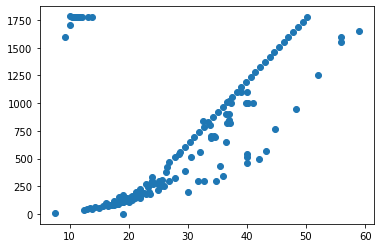

In [ ]:
plt.scatter(data['Length1'],data['Weight'])
plt.show()
#not-linear

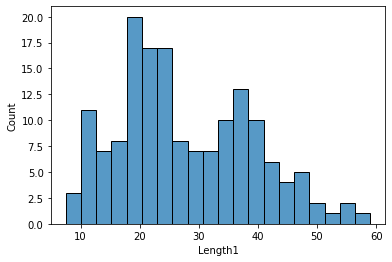

In [ ]:
sns.histplot(data['Length1'], bins=20)

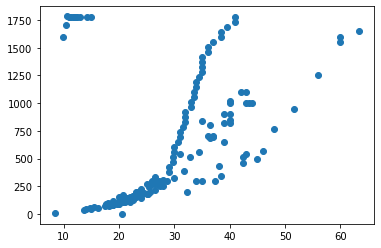

In [ ]:
plt.scatter(data['Length2'],data['Weight'])
plt.show()
#not-linear

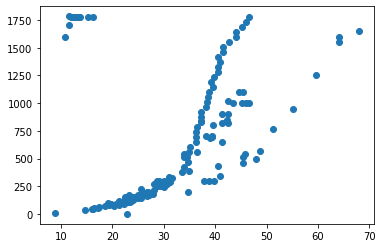

In [ ]:
plt.scatter(data['Length3'],data['Weight'])
plt.show()

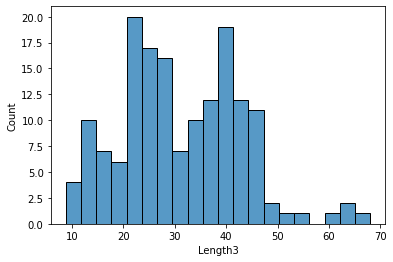

In [ ]:
sns.histplot(data['Length3'], bins=20)

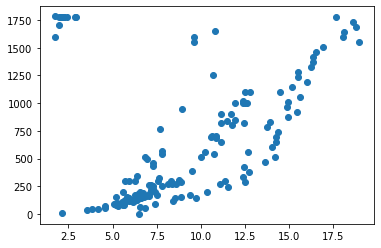

In [ ]:
plt.scatter(data['Height'],data['Weight'])
plt.show()

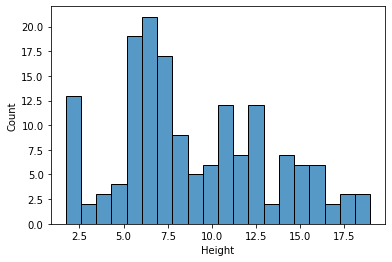

In [ ]:
sns.histplot(data['Height'], bins=20)

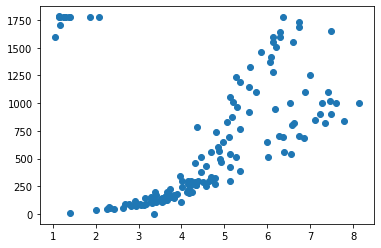

In [ ]:
plt.scatter(data['Width'],data['Weight'])
plt.show()

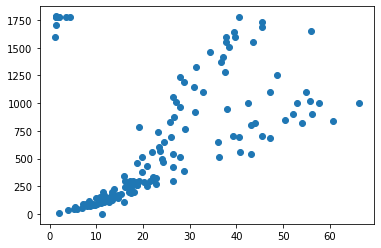

In [ ]:
data['WidthSquared']=data['Width']**2
plt.scatter(data['WidthSquared'],data['Weight'])
plt.show()

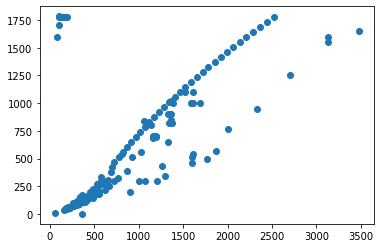

In [ ]:
data['Length1Squared']=data['Length1']**2
plt.scatter(data['Length1Squared'],data['Weight'])
plt.show()

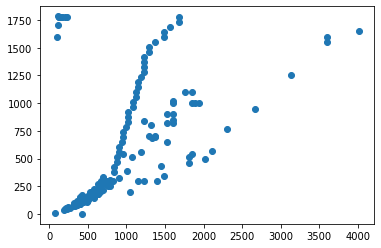

In [ ]:
data['Length2Squared']=data['Length2']**2
plt.scatter(data['Length2Squared'],data['Weight'])
plt.show()

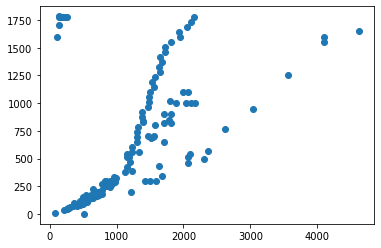

In [ ]:
data['Length3Squared']=data['Length3']**2
plt.scatter(data['Length3Squared'],data['Weight'])
plt.show()

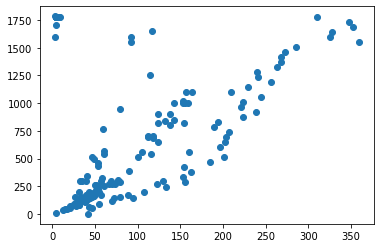

In [ ]:
data['HeightSquared']=data['Height']**2
plt.scatter(data['HeightSquared'],data['Weight'])
plt.show()
#showsHeteroscedasticity

In [ ]:
data.corr()
#remove Length1 & Length2 i.e Highly Correlated

,Weight,Length1,Length2,Length3,Height,Width,WidthSquared,Length1Squared,Length2Squared,Length3Squared,HeightSquared
Weight,1.000000,0.380629,0.258586,0.280078,0.286272,0.187936,0.325975,0.482760,0.345760,0.375002,0.430172
Length1,0.380629,1.000000,0.960991,0.975891,0.765935,0.868838,0.835691,0.978550,0.918785,0.947227,0.719366
Length2,0.258586,0.960991,1.000000,0.994103,0.640441,0.873547,0.839335,0.930723,0.971139,0.974802,0.548747
Length3,0.280078,0.975891,0.994103,1.000000,0.703409,0.878520,0.837635,0.942890,0.956824,0.972963,0.618901
Height,0.286272,0.765935,0.640441,0.703409,1.000000,0.792881,0.739312,0.697773,0.521330,0.598269,0.972436
Width,0.187936,0.868838,0.873547,0.878520,0.792881,1.000000,0.974896,0.792672,0.779722,0.795875,0.695692
WidthSquared,0.325975,0.835691,0.839335,0.837635,0.739312,0.974896,1.000000,0.786669,0.777181,0.785761,0.668612
Length1Squared,0.482760,0.978550,0.930723,0.942890,0.697773,0.792672,0.786669,1.000000,0.934417,0.959547,0.679741
Length2Squared,0.345760,0.918785,0.971139,0.956824,0.521330,0.779722,0.777181,0.934417,1.000000,0.993149,0.448793
Length3Squared,0.375002,0.947227,0.974802,0.972963,0.598269,0.795875,0.785761,0.959547,0.993149,1.000000,0.534552


In [ ]:
data=pd.concat([data,pd.get_dummies(data["Species"],drop_first=True)],1)
data=data.drop(['Length1','Length2','Length1Squared','Length2Squared','Species'],axis=1)
data.head()

,Weight,Length3,Height,Width,WidthSquared,Length3Squared,HeightSquared,Goldfish,Parkki,Perch,Rainbow Trout,muskellunge,white bass
0,245.0,30.0,11.5200,4.0200,16.160400,900.00,132.710400,0,0,0,1,0,0
1,290.0,31.2,12.4800,4.3056,18.538191,973.44,155.750400,0,0,0,1,0,0
2,335.0,31.1,12.3778,4.6961,22.053355,967.21,153.209933,0,0,0,1,0,0
3,380.0,33.5,12.7300,4.4555,19.851480,1122.25,162.052900,0,0,0,1,0,0
4,425.0,34.0,12.4440,5.1340,26.357956,1156.00,154.853136,0,0,0,1,0,0


In [ ]:
X=data.drop(['Weight'],axis=1).values.reshape(-1,12)
Y=data['Weight'].values.reshape(159)

In [ ]:
X = sm.add_constant(X)
est = sm.OLS(Y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     746.8
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          1.78e-124
Time:                        09:58:19   Log-Likelihood:                -906.65
No. Observations:                 159   AIC:                             1839.
Df Residuals:                     146   BIC:                             1879.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -104.8375    115.787     -0.905      0.367    -333.672     123.997
x1             3.9576      9.319      0.425      0.672     -14.461      22.376
x2          -146.5064     28.503     -5.140      0.000    -202.839     -90.174
x3            52.5651     59.630      0.882      0.379     -65.285     170.415
x4            -2.7458      4.520     -0.608      0.544     -11.678       6.187
x5             0.4036      0.078      5.152      0.000       0.249       0.558
x6             9.1904      0.770     11.934      0.000       7.668      10.712
x7           329.7462     89.506      3.684      0.000     152.852     506.640
x8           311.0151     75.448      4.122      0.000     161.904     460.126
x9           367.3294    125.174      2.935      0.004     119.942     614.716
x10          230.8986    127.824      1.806      0.073     -21.727     483.524
x11         1956.2901     72.309     27.055      0.000    1813.383    2099.197
x12          300.9470     79.515      3.785      0.000     143.798     458.096
==============================================================================
Omnibus:                        5.878   Durbin-Watson:                   1.041
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                8.799
Skew:                          -0.098   Prob(JB):                       0.0123
Kurtosis:                       4.136   Cond. No.                     5.61e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
reg = linear_model.LinearRegression() 

reg.fit(x_train, y_train) 
print('Coefficient : ', reg.coef_,' and Y-Intercept : ',reg.intercept_) 

Coefficient :  [ 0.00000000e+00  2.04384277e+00 -1.47316928e+02  5.34623064e+01
 -2.75921252e+00  3.96094101e-01  9.68904023e+00  2.79745808e+02
  2.72447207e+02  3.01556395e+02  1.40988694e+02  1.91705980e+03
  2.66091934e+02]  and Y-Intercept :  -29.313897851075126


In [ ]:
y_predicted=reg.predict(x_test)
print("Mean Squared error is ", mean_squared_error(y_test,y_predicted))
print("R2 score is ", r2_score(y_test, y_predicted))

Mean Squared error is  7749.676363888147
R2 score is  0.975130057413185
